In [9]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import log

# Athletes Dataset
## Read Dataset CSV

In [72]:
ds = pd.read_csv("https://abe-southside-final-project.s3.us-east-2.amazonaws.com/athlete_events.csv")
ds

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


### Features (columns)

In [73]:
ds["BMI"] = round(ds["Weight"]/(ds["Height"]*ds["Height"]),2)
ds = ds.loc[ds["BMI"].notna(),:]
ds = ds[["Sex", "Age", "BMI", "NOC", "Year", "Season", "Sport", "Medal"]]
ds = ds.loc[(ds["Sport"] == 'Athletics') | (ds["Sport"] == 'Aquatics'),:]
ds = ds.loc[ds["Season"] == "Summer",:]
ds = ds.loc[ds["Year"] < 2016,:]
ds = ds.loc[ds["Sex"] == "M",:]
# ds = ds.loc[ds["Height"].notna(),:]
# ds = ds.loc[ds["Weight"].notna(),:]
# ds = ds.loc[ds['Medal'] == "Gold",:]
# ds.loc[(ds['Medal'].isna()),'Medal']= 'Non-Medal'
ds.loc[(ds['Medal'] == 'Gold'),'Medal']='Medal'
ds.loc[(ds['Medal'] == 'Silver'),'Medal']='Medal'
ds.loc[(ds['Medal'] == 'Bronze'),'Medal']='Medal'
ds.loc[(ds['Medal'].isna()),'Medal']= 'Non-Medal'
ds

,Sex,Age,BMI,NOC,Year,Season,Sport,Medal
57,M,31.0,0.0,FIN,2000,Summer,Athletics,Non-Medal
94,M,24.0,0.0,EST,1936,Summer,Athletics,Non-Medal
98,M,30.0,0.0,FRA,2012,Summer,Athletics,Non-Medal
130,M,22.0,0.0,NOR,1920,Summer,Athletics,Non-Medal
131,M,22.0,0.0,NOR,1920,Summer,Athletics,Non-Medal
...,...,...,...,...,...,...,...,...
270959,M,23.0,0.0,ZIM,2004,Summer,Athletics,Non-Medal
271025,M,27.0,0.0,TCH,1980,Summer,Athletics,Non-Medal
271044,M,25.0,0.0,USA,1964,Summer,Athletics,Non-Medal
271045,M,21.0,0.0,POL,1980,Summer,Athletics,Non-Medal


## Data Processing

In [74]:
X = pd.get_dummies(ds[["Sex", "Age", "NOC", "Year", "Season", "Sport", "Medal"]])
y = ds["BMI"].values.reshape(-1,1)
print(X.shape, y.shape)

(20339, 227) (20339, 1)


In [75]:
ds["Sport"].unique()

array(['Athletics'], dtype=object)

# Scaling and Normalization

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [77]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

# Standardscaler

In [76]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [77]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [78]:
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["weight"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["weight"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

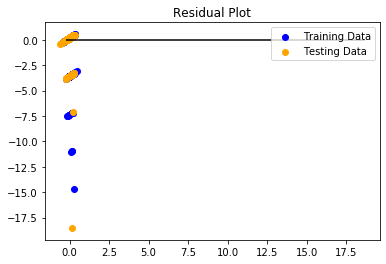

In [79]:
# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()